## Student Performance Analysis 📊
*This notebook explores the StudentsPerformance dataset to build a model that predicts writing scores based on demographic and academic factors.*



## 1. Import Libraries

In [17]:
# ## 1. Get Ready

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make the plots look nice
plt.style.use('default')
sns.set_palette("husl")


## 2. Load and Explore Data


In [18]:

# Load the CSV file
df = pd.read_csv('StudentsPerformance.csv')

# Show the first few rows
print("Here's what the data looks like:")
df.head()

# %%
# Basic info
print("Data shape (rows, columns):", df.shape)
print("\nColumn names (these match what my MATLAB model expects!):")
print(df.columns.tolist())


Here's what the data looks like:
Data shape (rows, columns): (1000, 8)

Column names (these match what my MATLAB model expects!):
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


## 3. Understanding the Data 🔍


In [19]:
# %%
# See what values each category can have
print("Possible values for each category:")
print("\nGender:", df['gender'].unique())
print("\nRace/Ethnicity:", df['race/ethnicity'].unique())
print("\nParent Education:", df['parental level of education'].unique())
print("\nLunch:", df['lunch'].unique())
print("\nTest Prep:", df['test preparation course'].unique())

# %%
# Score ranges
print("Score ranges (0-100 scale):")
for subject in ['math score', 'reading score', 'writing score']:
    print(f"{subject}: {df[subject].min()} to {df[subject].max()}")


Possible values for each category:

Gender: ['female' 'male']

Race/Ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']

Parent Education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Lunch: ['standard' 'free/reduced']

Test Prep: ['none' 'completed']
Score ranges (0-100 scale):
math score: 0 to 100
reading score: 17 to 100
writing score: 10 to 100


## 3. Data Visualization


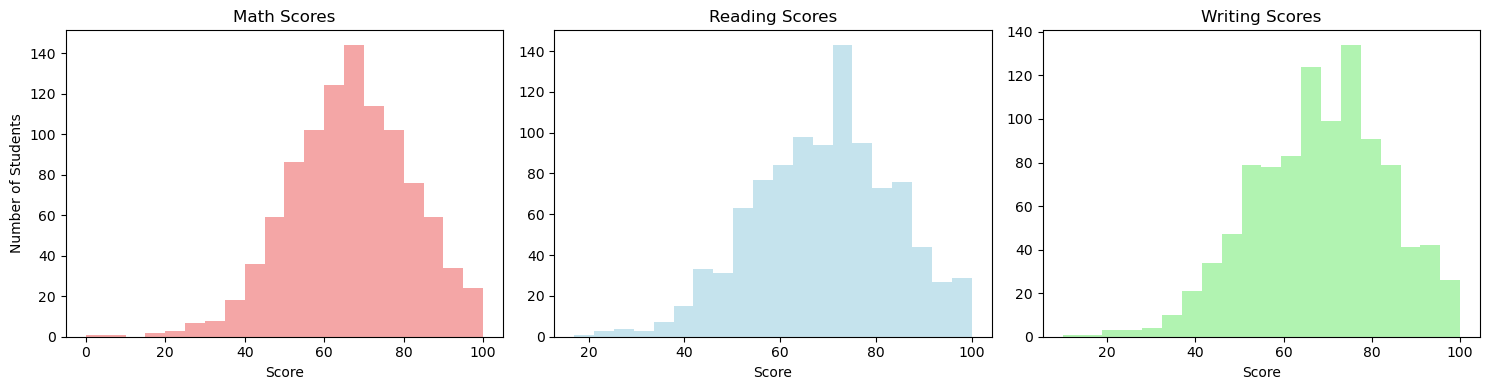

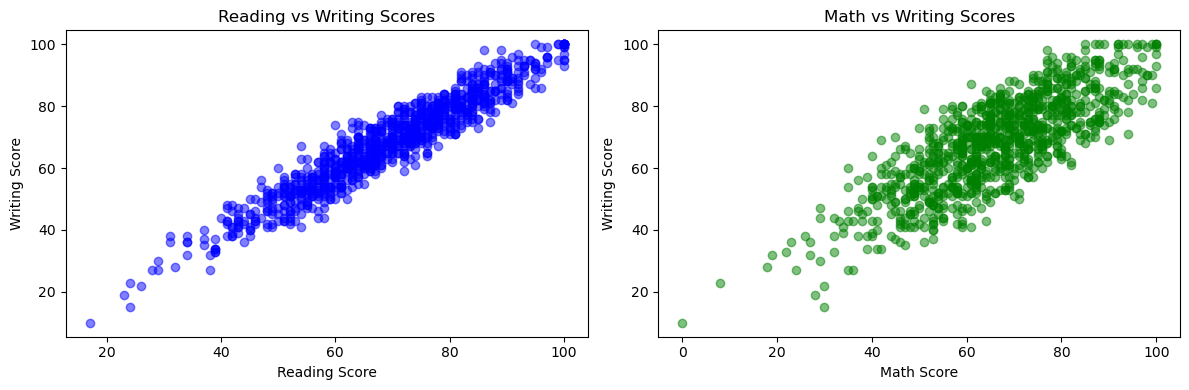

Reading and Writing correlation: 0.955
Math and Writing correlation: 0.803

(1.0 = perfect match, 0 = no relationship, -1.0 = opposite)


In [20]:
# Plot all three scores
plt.figure(figsize=(15, 4))

subjects = ['math score', 'reading score', 'writing score']
names = ['Math', 'Reading', 'Writing']

for i, (subject, name) in enumerate(zip(subjects, names)):
    plt.subplot(1, 3, i+1)
    plt.hist(df[subject], bins=20, alpha=0.7, color=['lightcoral', 'lightblue', 'lightgreen'][i])
    plt.title(f'{name} Scores')
    plt.xlabel('Score')
    if i == 0:
        plt.ylabel('Number of Students')

plt.tight_layout()
plt.show()

# %%
# See how scores relate to each other
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(df['reading score'], df['writing score'], alpha=0.5, color='blue')
plt.title('Reading vs Writing Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')

plt.subplot(1, 2, 2)
plt.scatter(df['math score'], df['writing score'], alpha=0.5, color='green')
plt.title('Math vs Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')

plt.tight_layout()
plt.show()

# %%
# Calculate correlations
reading_corr = df['reading score'].corr(df['writing score'])
math_corr = df['math score'].corr(df['writing score'])

print(f"Reading and Writing correlation: {reading_corr:.3f}")
print(f"Math and Writing correlation: {math_corr:.3f}")
print("\n(1.0 = perfect match, 0 = no relationship, -1.0 = opposite)")


## 5. What Affects Writing Scores? 🎯


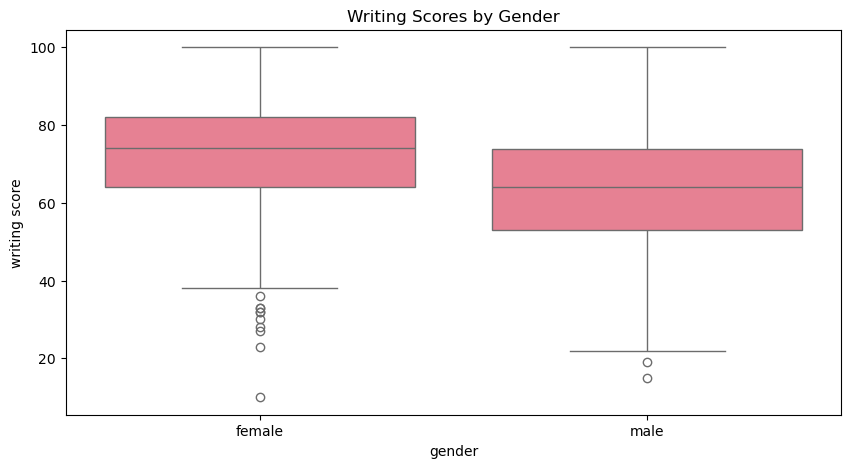

Average writing scores:
Female: 72.5
Male: 63.3


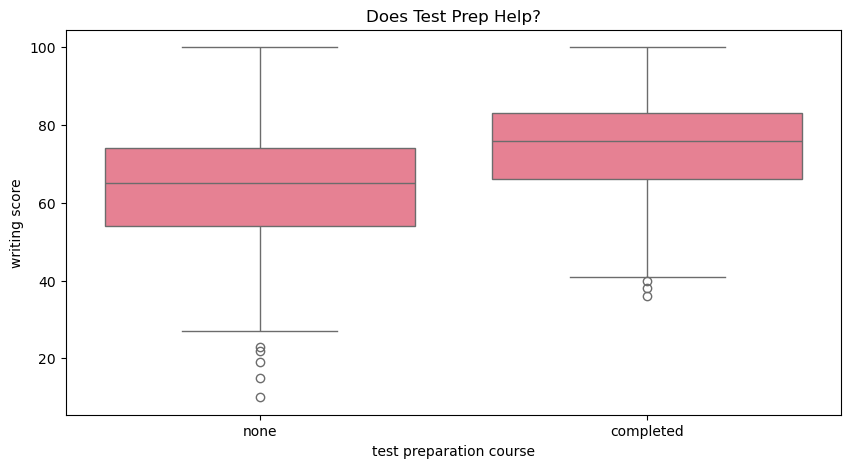

With test prep: 74.4
Without test prep: 64.5
Test prep helps by 9.9 points!


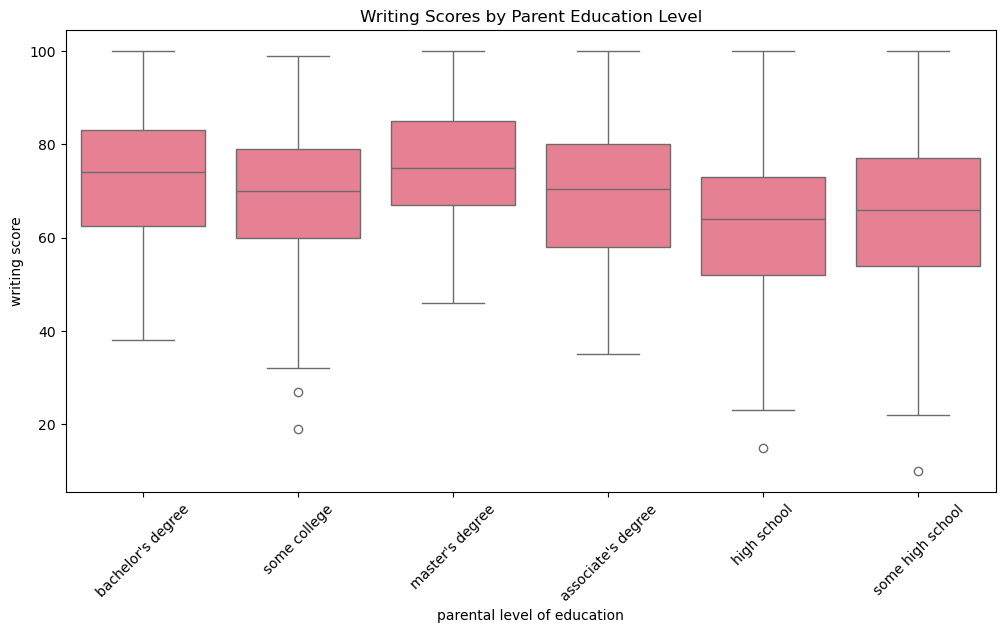

Average writing scores by parent education:
parental level of education
master's degree       75.7
bachelor's degree     73.4
associate's degree    69.9
some college          68.8
some high school      64.9
high school           62.4
Name: writing score, dtype: float64


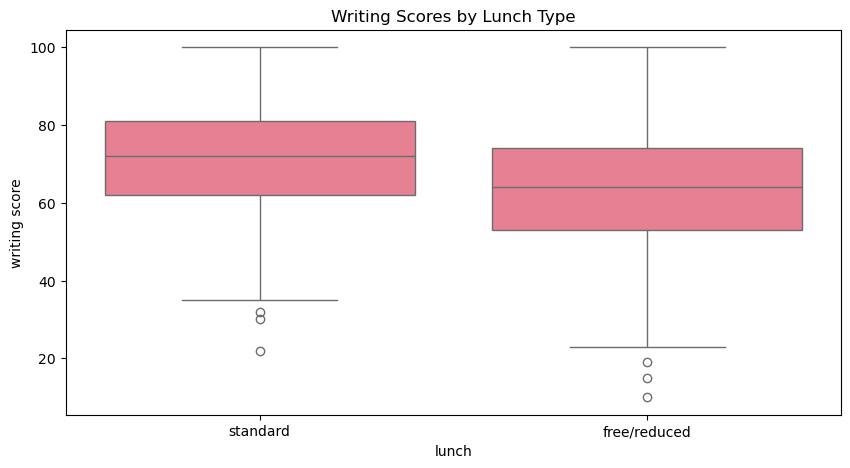

Standard lunch: 70.8
Free/reduced lunch: 63.0


In [21]:
# %%
# Gender differences
plt.figure(figsize=(10, 5))
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Writing Scores by Gender')
plt.show()

gender_avg = df.groupby('gender')['writing score'].mean()
print(f"Average writing scores:")
print(f"Female: {gender_avg['female']:.1f}")
print(f"Male: {gender_avg['male']:.1f}")

# %%
# Test preparation impact
plt.figure(figsize=(10, 5))
sns.boxplot(x='test preparation course', y='writing score', data=df)
plt.title('Does Test Prep Help?')
plt.show()

prep_avg = df.groupby('test preparation course')['writing score'].mean()
print(f"With test prep: {prep_avg['completed']:.1f}")
print(f"Without test prep: {prep_avg['none']:.1f}")
print(f"Test prep helps by {prep_avg['completed'] - prep_avg['none']:.1f} points!")

# %%
# Parent education impact
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='writing score', data=df)
plt.title('Writing Scores by Parent Education Level')
plt.xticks(rotation=45)
plt.show()

# Show the averages
parent_avg = df.groupby('parental level of education')['writing score'].mean().sort_values(ascending=False)
print("Average writing scores by parent education:")
print(parent_avg.round(1))

# %%
# Lunch type impact
plt.figure(figsize=(10, 5))
sns.boxplot(x='lunch', y='writing score', data=df)
plt.title('Writing Scores by Lunch Type')
plt.show()

lunch_avg = df.groupby('lunch')['writing score'].mean()
print(f"Standard lunch: {lunch_avg['standard']:.1f}")
print(f"Free/reduced lunch: {lunch_avg['free/reduced']:.1f}")


 ## 6. Why This Matters for My MATLAB Model 🤖


In [22]:
# %%
print("="*60)
print("HOW THIS ANALYSIS HELPS MY MATLAB PREDICTION MODEL")
print("="*60)

print("\n📊 I NOW UNDERSTAND MY DATA BETTER:")
print(f"- I have {len(df)} students in my dataset")
print(f"- Writing scores range from {df['writing score'].min()} to {df['writing score'].max()}")

print("\n🎯 I KNOW WHAT AFFECTS WRITING SCORES:")
print(f"- Reading score is the strongest factor (correlation: {reading_corr:.3f})")
print(f"- Math score also matters (correlation: {math_corr:.3f})")
print(f"- Test prep helps by {prep_avg['completed'] - prep_avg['none']:.1f} points")
print(f"- Gender makes a {gender_avg['female'] - gender_avg['male']:.1f} point difference")

print("\n🔍 I CAN EXPLAIN WHY MY MODEL WORKS:")
print("- My MATLAB model uses all these factors to predict writing scores")
print("- Now I understand WHY it might make certain predictions")
print("- I can tell people what really affects writing performance")

print("\n💡 I CAN MAKE BETTER PREDICTIONS:")
print("- If a student has high reading scores, my model will predict high writing scores")
print("- If a student completed test prep, my model will predict a better score")
print("- This analysis helps me trust my model's predictions")


HOW THIS ANALYSIS HELPS MY MATLAB PREDICTION MODEL

📊 I NOW UNDERSTAND MY DATA BETTER:
- I have 1000 students in my dataset
- Writing scores range from 10 to 100

🎯 I KNOW WHAT AFFECTS WRITING SCORES:
- Reading score is the strongest factor (correlation: 0.955)
- Math score also matters (correlation: 0.803)
- Test prep helps by 9.9 points
- Gender makes a 9.2 point difference

🔍 I CAN EXPLAIN WHY MY MODEL WORKS:
- My MATLAB model uses all these factors to predict writing scores
- Now I understand WHY it might make certain predictions
- I can tell people what really affects writing performance

💡 I CAN MAKE BETTER PREDICTIONS:
- If a student has high reading scores, my model will predict high writing scores
- If a student completed test prep, my model will predict a better score
- This analysis helps me trust my model's predictions


## 7. Key Findings 🎓

In [23]:
print("="*50)
print("WHAT I LEARNED FROM THIS ANALYSIS")
print("="*50)

print("\n1. 📚 READING IS KEY:")
print("   Students who are good readers tend to be good writers")

print("\n2. 🧠 MATH HELPS TOO:")
print("   Math skills also relate to writing ability")

print("\3. 📝 TEST PREP WORKS:")
print("   Preparation courses actually improve scores")

print("\n4. 👥 GENDER DIFFERENCE:")
print("   Female students tend to score higher in writing")

print("\n5. 🏠 PARENT EDUCATION MATTERS:")
print("   More educated parents → better writing scores")

print("\n6. 🍽️ LUNCH TYPE AFFECTS SCORES:")
print("   Students with standard lunch score higher")

print("\n" + "="*50)
print("This analysis helps me understand WHAT my MATLAB model")
print("is doing and WHY it makes certain predictions! 🎯")


WHAT I LEARNED FROM THIS ANALYSIS

1. 📚 READING IS KEY:
   Students who are good readers tend to be good writers

2. 🧠 MATH HELPS TOO:
   Math skills also relate to writing ability
. 📝 TEST PREP WORKS:
   Preparation courses actually improve scores

4. 👥 GENDER DIFFERENCE:
   Female students tend to score higher in writing

5. 🏠 PARENT EDUCATION MATTERS:
   More educated parents → better writing scores

6. 🍽️ LUNCH TYPE AFFECTS SCORES:
   Students with standard lunch score higher

This analysis helps me understand WHAT my MATLAB model
is doing and WHY it makes certain predictions! 🎯
